# Data analysis of volcanoes and earthquakes
## 1. Introduce and Research Question
### Briefing
Volcanoes and earthquakes are the most intense natural disasters. With the ever-increasing amount of data and data types about ‘’volcanoes and earthquakes’’,  it is feasible and meaningful to mine the core value of the data. The deep and comprehensive insights provided by development will have a huge impact on data management, emergency decision-making, earthquake situation analysis, and information services. In this report, the DBSCAN algorithm is used to perform cluster analysis besed on the obtained information of earthquakes and volcanoes, and the clustering results are drawn on the global map. They can be divided into specific gathering zones by adjusting the parameters of DBSCAN algorithm. In order to further explore the seismic data, Random Forest algorithm is used to model the depth and magnitude of earthquakes.

### Research Question
Q1. How does the volcanoes and earthquake sites around the world cluster?

Q2. How accurately can machine learning predict the depth and magnitude of an earthquake?

In [1]:
# Please install this package in advance
# pip install cartopy

In [2]:
# read the database
import numpy as np
import pandas as pd
from pandas import Series
import matplotlib.pyplot as plt
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import warnings
import sklearn.cluster as skc 
from sklearn import metrics 
warnings.filterwarnings('ignore')
%matplotlib inline


## 2. Literature Review
Volcanoes and earthquakes are both manifestations of current geodynamics, and earthquakes have mainly reflected the concentration and release of tectonic mechanical energy, while volcanoes mainly reflect magmatic heat concentration and release of energy(Manga et al., 2017). An Yi Keiichi believes that volcanoes and earthquakes can be very similar not only in prediction strategies but also in physical models. In fact, the basic rupture mechanism of earthquakes is similar to that of volcanoes. Rupture during seismic activity promotes the dislocation of blocks on both sides of the fault, while during volcanic activity, rupture causes high-pressure magma to overflow, which proves that the volcano and the pre-earthquake stress and fracture are similar and belong to a new branch of geophysics(Mogi, 1974).

Although the global earthquake and volcanic activity scores based on historical records, the main area and form of the cloth have changed significantly over time. According to palaeomagnetism, post-ice rebound, and modern GPS measurements, the plate motion velocity vectors are roughly the same, indicating that the plate motion has been stable for several million years. Anderson pointed out that due to the strong nonlinearity of thermal expansion, conduction and viscosity coefficients, the mantle convection under high pressure is slow and large-scale(Deschamps, Li and Tackley, 2015). The above studies are based on the physical analysis of specific continental plates. Due to the popularity of modern big data, the analysis of volcanoes and earthquakes can be more visualized and clear. 

## 3. Data Preprocessing and Presentation
Volcanoes and earthquakes have always been natural disasters that cause great losses to human beings. This article digs further into the statistical data of volcanoes and earthquakes. Data sources are as follows.

The seismic data used in this paper were obtained from the US Geological Survey(USGS.gov | Science for a changing world). The Earthquakes dataset contains the date, time, location, depth, magnitude, and source of every earthquake with a reported magnitude 5.5 or higher since 1965.

The volcanic data used in this paper were obtained from the Smithsonian Institution(Smithsonian Institution, no date). The Volcanoes dataset contains the recent details about volcanoes and their eruptive history over the past 10,000 years.

In [3]:
# Import Data
#vol_data = pd.read_csv(r'C:\Users\hc\Desktop\Vocano\database_voc.csv')
#ear_data = pd.read_csv(r'C:\Users\hc\Desktop\Vocano\database_ear.csv')
vol_data = pd.read_csv('https://github.com/Sensing-ucl/CASA0006-DSSS/raw/main/database_voc.csv')
ear_data = pd.read_csv('https://github.com/Sensing-ucl/CASA0006-DSSS/raw/main/database_ear.csv')
vol_data.head()

,Number,Name,Country,Region,Type,Activity Evidence,Last Known Eruption,Latitude,Longitude,Elevation (Meters),Dominant Rock Type,Tectonic Setting
0,210010,West Eifel Volcanic Field,Germany,Mediterranean and Western Asia,Maar(s),Eruption Dated,8300 BCE,50.170,6.85,600,Foidite,Rift Zone / Continental Crust (>25 km)
1,210020,Chaine des Puys,France,Mediterranean and Western Asia,Lava dome(s),Eruption Dated,4040 BCE,45.775,2.97,1464,Basalt / Picro-Basalt,Rift Zone / Continental Crust (>25 km)
2,210030,Olot Volcanic Field,Spain,Mediterranean and Western Asia,Pyroclastic cone(s),Evidence Credible,Unknown,42.170,2.53,893,Trachybasalt / Tephrite Basanite,Intraplate / Continental Crust (>25 km)
3,210040,Calatrava Volcanic Field,Spain,Mediterranean and Western Asia,Pyroclastic cone(s),Eruption Dated,3600 BCE,38.870,-4.02,1117,Basalt / Picro-Basalt,Intraplate / Continental Crust (>25 km)
4,211001,Larderello,Italy,Mediterranean and Western Asia,Explosion crater(s),Eruption Observed,1282 CE,43.250,10.87,500,No Data,Subduction Zone / Continental Crust (>25 km)


For convenience, a function is created to go to the bar graph.

In [4]:
# define a function to draw bar
def fig_p(data):
    series=Series(data).value_counts().sort_index()
    series.plot(kind='bar')

In the process of data visualization, the longitude and latitude of earthquakes and volcanoes need to be read out from the CSV file.Then draw all the data on the world map.

In [5]:
# the process of data Visualization
earthquakes_eq=pd.DataFrame()
earthquakes_eq=ear_data[ear_data['Type']=='Earthquake']

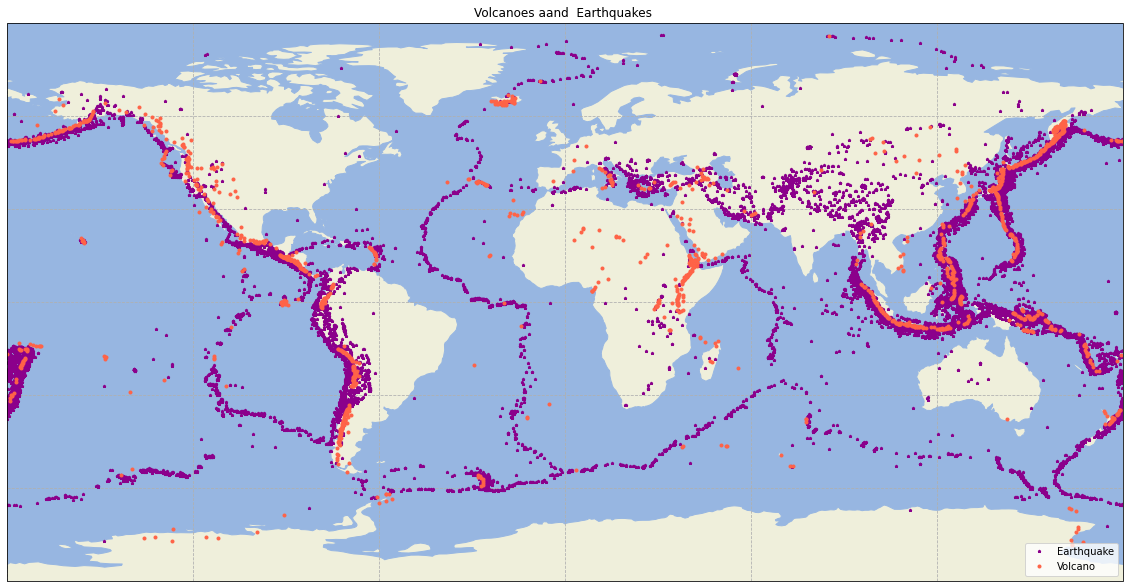

In [6]:
longitudes_vol = vol_data["Longitude"].tolist()
latitudes_vol = vol_data["Latitude"].tolist()

longitudes_eq = ear_data["Longitude"].tolist()
latitudes_eq = ear_data["Latitude"].tolist()

fig1 = plt.figure(figsize=[20, 15])
# Set projection
ax1 = plt.axes(projection=ccrs.PlateCarree())
# Add ocean and land
ax1.add_feature(cfeature.LAND)
ax1.add_feature(cfeature.OCEAN)
# Add volcano ande eqrthquake sites
ax1.plot(longitudes_eq, latitudes_eq, '*',markersize=3, color='darkmagenta',
        label='Earthquake', transform=ccrs.Geodetic())
ax1.plot(longitudes_vol, latitudes_vol, 'o',markersize=3, color='tomato',
        label='Volcano', transform=ccrs.Geodetic())
plt.title("Volcanoes aand  Earthquakes ")
# Plot gridlines
ax1.gridlines(linestyle='--')
# Set figure extent
ax1.set_global()
# Set legend location
plt.legend(loc='lower right')
# Show figure
plt.show()

Due to the large number of data points, for the convenience of viewing the map, the distribution of volcanoes and earthquakes are drawn separately here.

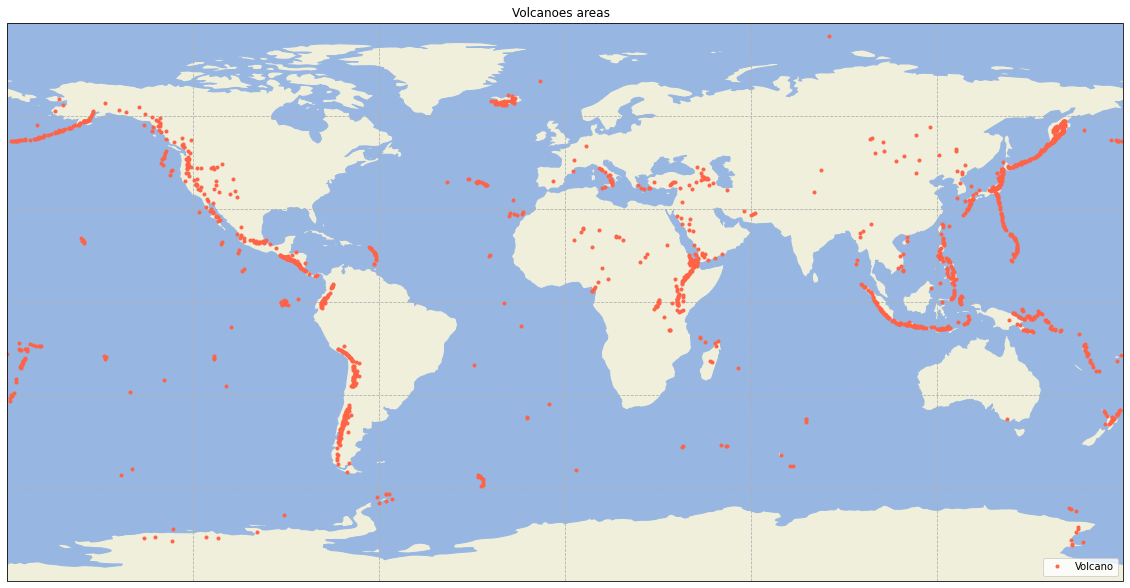

In [7]:
fig2 = plt.figure(figsize=[20, 15])
# Set projection
ax2 = plt.axes(projection=ccrs.PlateCarree())
# Add ocean and land
ax2.add_feature(cfeature.LAND)
ax2.add_feature(cfeature.OCEAN)
# Add volcano ande eqrthquake sites
ax2.plot(longitudes_vol, latitudes_vol, 'o',markersize=3, color='tomato',
        label='Volcano', transform=ccrs.Geodetic())
plt.title("Volcanoes areas  ")
# Plot gridlines
ax2.gridlines(linestyle='--')
# Set figure extent
ax2.set_global()
# Set legend location
plt.legend(loc='lower right')
# Show figure
plt.show()

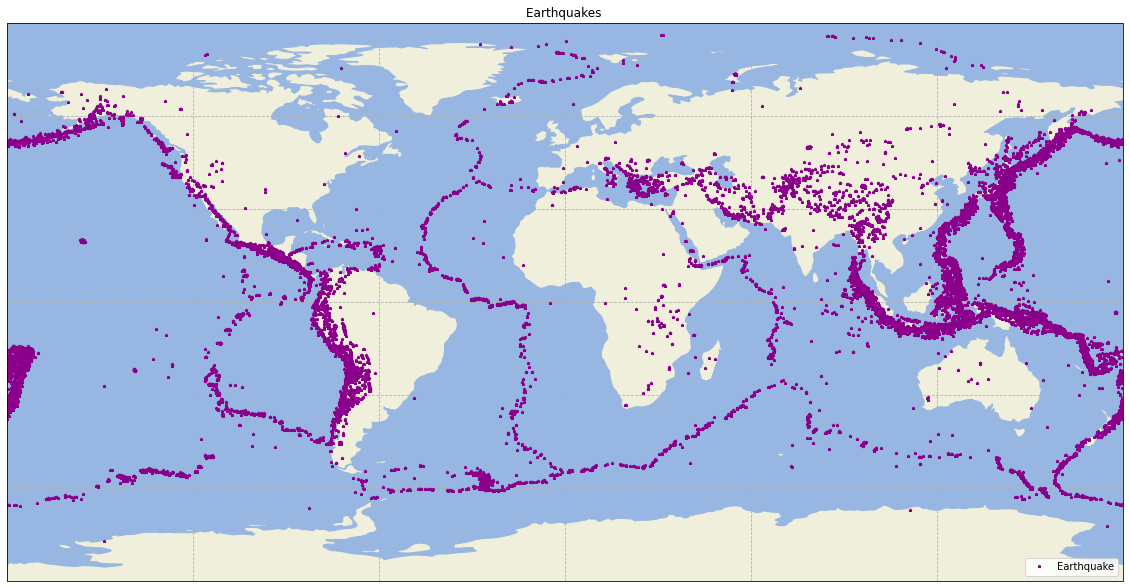

In [8]:
longitudes_vol = vol_data["Longitude"].tolist()
latitudes_vol = vol_data["Latitude"].tolist()

longitudes_eq = ear_data["Longitude"].tolist()
latitudes_eq = ear_data["Latitude"].tolist()

fig3 = plt.figure(figsize=[20, 15])
# Set projection
ax3 = plt.axes(projection=ccrs.PlateCarree())
# Add ocean and land
ax3.add_feature(cfeature.LAND)
ax3.add_feature(cfeature.OCEAN)
# Add volcano ande eqrthquake sites

ax3.plot(longitudes_eq, latitudes_eq, '*',markersize=3, color='darkmagenta',
        label='Earthquake', transform=ccrs.Geodetic())
plt.title("Earthquakes ")
# Plot gridlines
ax3.gridlines(linestyle='--')
# Set figure extent
ax3.set_global()
# Set legend location
plt.legend(loc='lower right')
# Show figure
plt.show()

(126, 12)
(2301, 22)


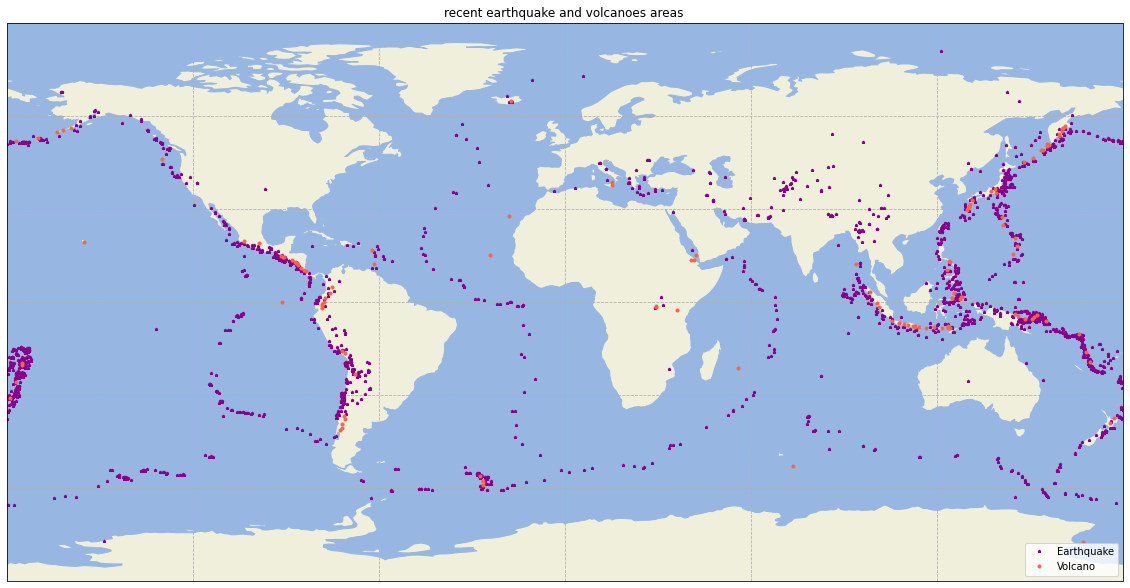

In [9]:
#recent earthquake and volcano
recent_active = vol_data[(vol_data ["Last Known Eruption"]>='2012 CE') & (vol_data["Last Known Eruption"]<='2016 CE')]
print(recent_active.shape)
longitudes_vol = recent_active["Longitude"].tolist()
latitudes_vol = recent_active["Latitude"].tolist()

earthquakes_eq["Date"] = pd.to_datetime(earthquakes_eq["Date"], utc=True)

#earthquakes_eq["Date"] = pd.to_datetime(earthquakes_eq["Date"])
earthquakes_eq["year"] = earthquakes_eq['Date'].dt.year
last_eq = earthquakes_eq[(earthquakes_eq["year"]>=2012) & (earthquakes_eq["year"]<=2016)]
print(last_eq.shape)

longitudes_eq = last_eq["Longitude"].tolist()
latitudes_eq = last_eq["Latitude"].tolist()

fig4 = plt.figure(figsize=[20, 15])
# Set projection
ax4 = plt.axes(projection=ccrs.PlateCarree())
# Add ocean and land
ax4.add_feature(cfeature.LAND)
ax4.add_feature(cfeature.OCEAN)
# Add volcano ande eqrthquake sites

ax4.plot(longitudes_eq, latitudes_eq, '*',markersize=3,  color='darkmagenta',
        label='Earthquake', transform=ccrs.Geodetic())
ax4.plot(longitudes_vol, latitudes_vol, 'o',markersize=3, color='tomato',
        label='Volcano', transform=ccrs.Geodetic())
plt.title("recent earthquake and volcanoes areas ")

# Plot gridlines
ax4.gridlines(linestyle='--')
# Set figure extent
ax4.set_global()
# Set legend location
plt.legend(loc='lower right')
# Show figure
plt.show()

In order to understand the distribution of volcanoes more clearly, we draw a histogram of the distribution of volcanoes according to countries and regions.

Text(0.5, 1.0, 'Region with most volcanoes')

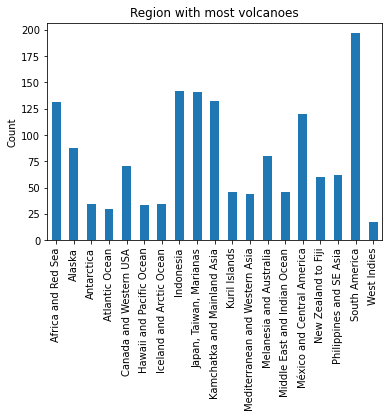

In [10]:
# distribution of volcanoes and regin
fig_p(vol_data["Region"])
plt.ylabel("Count")
plt.title("Region with most volcanoes")

Text(0.5, 1.0, 'Country with most volcanoes')

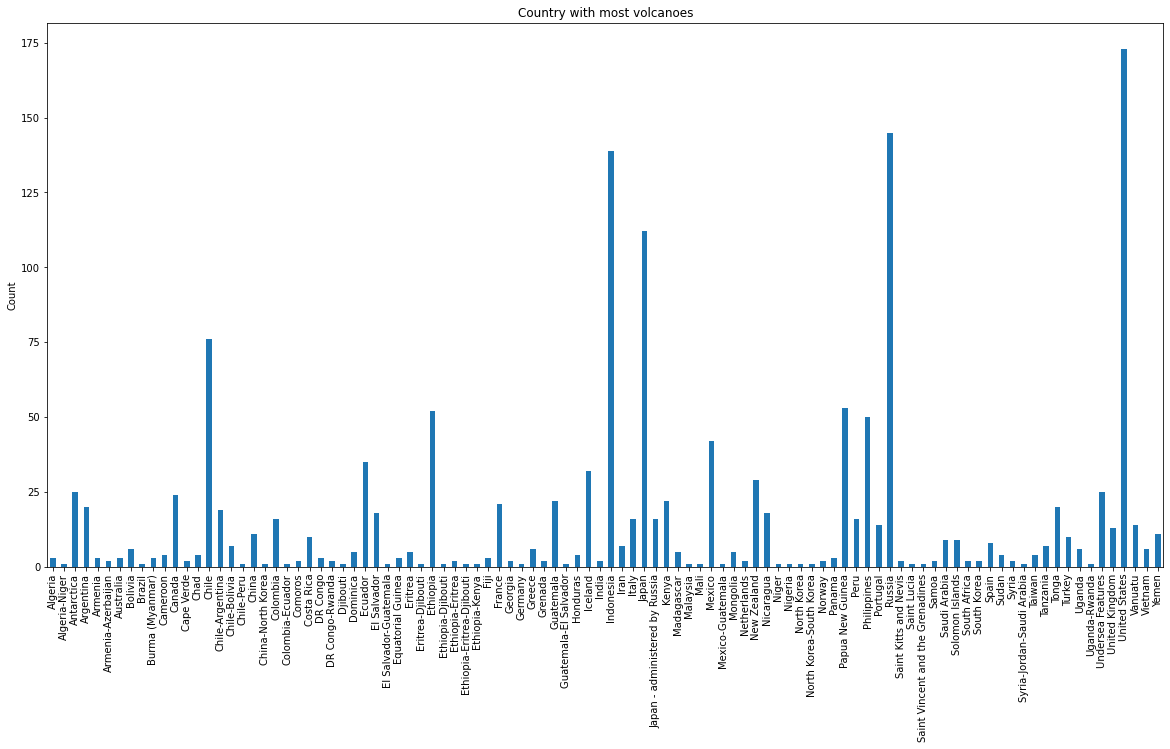

In [11]:
plt.figure(figsize=(20,10))
fig_p(vol_data["Country"])
plt.ylabel("Count")
plt.title("Country with most volcanoes")

## 4. Methodology
###  The main idea of the DBSCAN algorithm
The DBSCAN algorithm is a typical density-based clustering method. It defines clusters as the largest collection of densely connected points, can divide areas with sufficient density into clusters, and can find clusters of any shape in noisy spatial data sets. There are two important parameters in the BSCAN algorithm: Eps and Min_samples. Eps is the radius of the neighborhood when defining the density, and min_sample is the threshold when defining the core point.
The processing flow is as follows.

1. Randomly select a data object point p from the data set;

2. If for the parameters Eps and Minsamples, the selected data object point p is the core point, then find all the data object points reachable from p to form a cluster;

3. If the selected data object point p is an edge point, select another data object point;

4. Repeat steps (2) and (3) until all points are processed.


###  The main idea of the Random Forest algorithm
Random forest is an algorithm that integrates multiple trees through the idea of ensemble learning. Its basic unit is a decision tree, and its essence belongs to a large branch of machine learning-ensemble learning (Ensemble Learning) method. Explaining intuitively, each decision tree is a classifier (assuming we are now addressing a classification problem). So for one input sample, N trees will have N classification results. The random forest integrates all the classification votes and assigns the category with the highest number of votes as the final output


## 5. Analysis and Results
### a. Clusters Analysis

In [12]:
# the cluster by the DBSCAN
voldata=list(zip(longitudes_vol,latitudes_vol))
eardata=list(zip(longitudes_eq,latitudes_eq))
X1 = np.array(voldata)
X2 = np.array(eardata)
db1 = skc.DBSCAN(eps=10, min_samples=4).fit(X1)
db2 = skc.DBSCAN(eps=10, min_samples=4).fit(X2)
labels1 = db1.labels_
labels2 = db2.labels_
print('The cluster label of each volcano sample:')
print(labels1)
print('The cluster label of each earthquake sample:')
print(labels2)

The cluster label of each volcano sample:
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  0  0  0  0  1  1  1  1  1  1  1 -1
 -1 -1 -1  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  3  3  3  3  3  3  3  3  3  3  3  3  3  4  4  4  4  4
  4  4  4  4  4  4  4  4  4  5  5  5  5  5 -1 -1  6  6  6  6  6  6  6  6
  6  6  6  6  6  6  6  6  6  6  6  6 -1 -1 -1 -1  7  7  7  7  7 -1 -1 -1
 -1 -1 -1 -1 -1 -1]
The cluster label of each earthquake sample:
[0 1 2 ... 0 0 0]


#### Cluster analysis of volcanoes
The quality of the clustering analysis algorithm is mainly identified by the Silhouette Coefficient. In cluster analysis, the parameters we can adjust are eps and min_samples. In the following code, we constantly adjust these two parameters to reach a good level.

Noise ratio: 24.60%
Number of clusters: 8
Silhouette Coefficient: 0.410
All samples of: cluster  0
[[-179.033  -31.08 ]
 [-177.188  -25.887]
 [-175.382  -20.536]
 [-175.07   -19.75 ]]
All samples of: cluster  1
[[145.037  -4.08 ]
 [145.964  -4.649]
 [148.42   -5.525]
 [150.516  -5.576]
 [151.33   -5.05 ]
 [152.203  -4.271]
 [155.196  -6.137]]
All samples of: cluster  2
[[ 98.392   3.17 ]
 [100.473  -0.381]
 [101.264  -1.697]
 [105.423  -6.102]
 [107.6    -6.77 ]
 [109.208  -7.242]
 [110.442  -7.542]
 [112.308  -7.93 ]
 [112.92   -8.108]
 [112.95   -7.942]
 [114.056  -8.119]
 [116.47   -8.42 ]
 [119.07   -8.2  ]
 [121.708  -8.32 ]
 [123.505  -8.272]
 [123.57   -8.53 ]
 [123.585  -7.791]
 [124.13   -8.508]
 [124.737   1.112]
 [124.792   1.358]
 [125.4     2.78 ]
 [127.894   1.693]
 [127.63    1.488]
 [127.33    0.8  ]
 [123.132  10.412]
 [124.05   12.77 ]
 [123.685  13.257]]
All samples of: cluster  3
[[129.714  29.638]
 [130.217  30.443]
 [130.308  30.789]
 [130.657  31.593]
 [131.104  

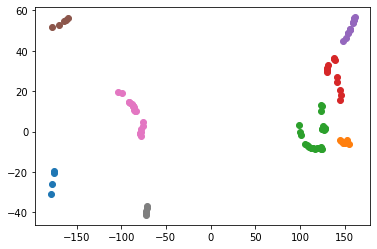

In [13]:
raito1 = len(labels1[labels1[:] == -1]) / len(labels1) #Calculate the ratio of the number of noise points to the total
print('Noise ratio:', format(raito1, '.2%'))

n_clusters_1 = len(set(labels1)) - (1 if -1 in labels1 else 0)  # Get the number of clusters

print('Number of clusters: %d' % n_clusters_1)
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X1, labels1)) #Silhouette coefficient to evaluate the quality of clustering
for i in range(n_clusters_1):
    print('All samples of:','cluster ', i)
    one_cluster1 = X1[labels1 == i]
    print(one_cluster1)
    plt.plot(one_cluster1[:,0],one_cluster1[:,1],'o')

plt.show()

### Cluster analysis of earthquake
The cluster analysis of earthquakes is actually similar to the cluster analysis of volcanoes. However, due to the wide distribution of earthquakes and a lot of data recorded in the data set, it is necessary to adjust the two parameters of eps and min_samples to achieve a perfect presentation effect.

Noise ratio: 24.60%
Number of clusters: 16
Silhouette Coefficient: 0.235
All samples of: cluster  7
[[138.072   31.456 ]
 [165.16   -10.617 ]
 [ 93.21     2.433 ]
 ...
 [140.4262  36.9179]
 [118.6639  -9.0283]
 [141.4103  37.3973]]
All samples of: cluster  7
[[-173.543   -17.691 ]
 [-176.935   -28.613 ]
 [-177.386   -29.43  ]
 [-174.035   -20.536 ]
 [-178.549   -17.968 ]
 [-177.5     -24.477 ]
 [-177.238   -24.495 ]
 [-177.73    -32.495 ]
 [-175.702   -14.621 ]
 [-177.236   -31.894 ]
 [-177.412   -28.556 ]
 [-175.95    -24.228 ]
 [-174.705   -18.685 ]
 [-174.227   -21.477 ]
 [-175.976   -19.962 ]
 [-179.61    -22.13  ]
 [-177.919   -15.279 ]
 [-176.34    -20.192 ]
 [-178.186   -17.963 ]
 [-178.65    -32.935 ]
 [-173.268   -15.222 ]
 [-177.362   -26.051 ]
 [-178.508   -20.872 ]
 [-179.287   -21.222 ]
 [-179.968   -37.713 ]
 [-174.491   -21.015 ]
 [-176.916   -16.919 ]
 [-178.358   -21.15  ]
 [-173.042   -15.598 ]
 [-176.807   -27.311 ]
 [-179.533   -33.435 ]
 [-178.513   -20.757 ]
 [-17

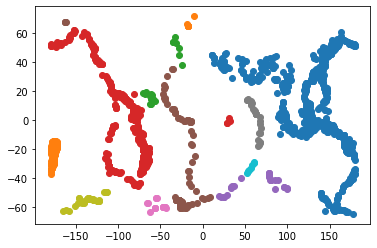

In [14]:

raito2 = len(labels2[labels2[:] == -1]) / len(labels2)  #计算噪声点个数占总数的比例
print('Noise ratio:', format(raito1, '.2%'))

n_clusters_2 = len(set(labels2)) - (1 if -1 in labels2 else 0)  # 获取分簇的数目

print('Number of clusters: %d' % n_clusters_2)
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X2, labels2)) #轮廓系数评价聚类的好坏

for a in range(n_clusters_2):
    print('All samples of:','cluster ', i)
    one_cluster2 = X2[labels2 == a]
    print(one_cluster2)
    plt.plot(one_cluster2[:,0],one_cluster2[:,1],'o')

plt.show()

### Visualization of cluster analysis
In order to better reflect the results of clustering. Cartory package is used here for drawing.

Text(0.5, 1.0, 'Visualization of volcanoes cluster analysis ')

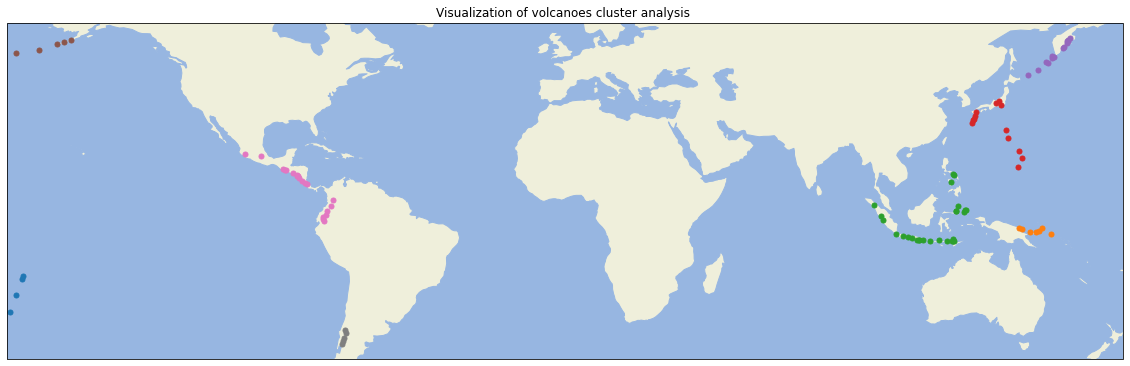

In [15]:
#draw the cluster conclusion into the map
fig5 = plt.figure(figsize=[20, 15])
# Set projection
ax5 = plt.axes(projection=ccrs.PlateCarree())
# Add ocean and land
ax5.add_feature(cfeature.LAND)
ax5.add_feature(cfeature.OCEAN)
# Add volcano ande eqrthquake sites
for a in range(n_clusters_1):
    one_cluster1 = X1[labels1 == a]
    ax5.plot(one_cluster1[:,0],one_cluster1[:,1],'o',markersize=5, transform=ccrs.Geodetic())
plt.title("Visualization of volcanoes cluster analysis ")


Text(0.5, 1.0, 'Visualization of earthquake cluster analysis ')

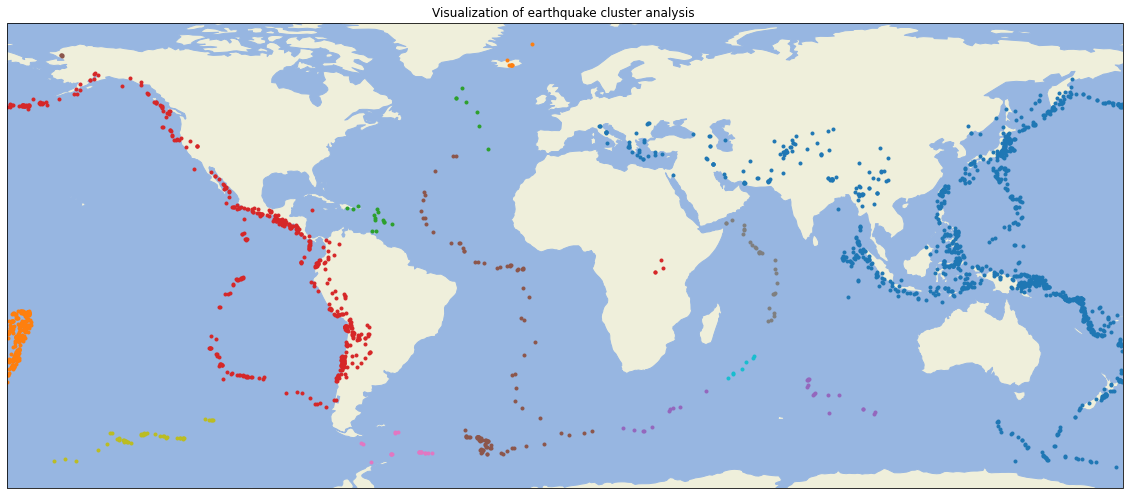

In [16]:
fig6 = plt.figure(figsize=[20, 15])
# Set projection
ax6 = plt.axes(projection=ccrs.PlateCarree())
# Add ocean and land
ax6.add_feature(cfeature.LAND)
ax6.add_feature(cfeature.OCEAN)
# Add volcano ande eqrthquake sites
for a in range(n_clusters_2):
    one_cluster2 = X2[labels2 == a]
    ax6.plot(one_cluster2[:,0],one_cluster2[:,1],'o',markersize=3, transform=ccrs.Geodetic())
plt.title("Visualization of earthquake cluster analysis ")

### Interpretation of clustering results
As can be seen from the clustering results, the distribution law of volcanoes and earthquakes is similar, usually occurring in the same area. Besides, the clusters of volcanoes and earthquakes are distributed in belts. This is because both volcanoes and earthquakes are located at the junction of two tectonic plates, which is caused by the collision and compression between tectonic plates. Through data comparison, DBSCAN  clustering results are consistent with the four major volcanic seismic regions in the world, which is as follows:

1.	The Pacific Rim Volcanic Belt:  from the west coast of North and South America, Alaska, Aleutian Islands, through Kamchatka, the Japanese Islands, and the Philippine Islands to New Zealand. 

2.	the Mediterranean Volcanic Belt: including Southern Europe, North African Coast, West Asia, Central Asia, Northwest and Southwest my country, Northern India, Western Indochina Peninsula, and the Malay Archipelago.


3.	the Atlantic Ridge Volcanic Belt: including mid-Atlantic ridge, Indian Ocean ridge, and mid-high (sea hill) in the East Pacific.

4.	the East African Volcanic Belt: mainly refers to the East African Rift Belt. It starts from the lower reaches of the Zambezi River in the south and passes through the East African Plateau, the Ethiopian Plateau, the Red Sea and the Dead Sea and the Jordan Valley in the north.

Moreover, in the above analysis, the clustering results for earthquakes are better than those for volcanoes. The main reason for this is that there is more seismic data than volcanic data, and some discrete submarine volcanic data are ignored in the processing.



## b. Random Forest Algorithm for Earthquake Prediction

###  The parameter adjustment of the random forest algorithm.
In scikit-learn, the classifier of RF is RandomForestClassifier, and the regressor is RandomForestRegressor. Similar to the tuning of GBDT, the parameters that need to be tuned for RF also include two parts. The first part is the parameters of the Bagging framework, and the second part is the parameters of the CART decision tree.

In the random forest algorithm for earthquake prediction, longitude and latitude parameters were used as training features, while the amplitude and depth of the earthquake were used as the target of the training set. when selecting the training set and test set, we used the random sampling method to make the trained model have a certain adaptability. In addition, the ratio of training set to test set is 4:1.
 
**n_estimators** is the maximum number of iterations of the weak learner. Generally speaking, if n_estimators is too small, it is easy to overfit. If n_estimators is too big, it is easy to underfit. In order to improve the accuracy of the model, the value of 'n_estimators' was adjusted continuously and finally determined to be 100.



In [17]:
#radnom forest
ear_data['Magnitude Type'] = pd.factorize(ear_data['Magnitude Type'])[0] + 1
ear_data = ear_data[ear_data['Type'] == 'Earthquake'] # Only take earthquakes into account

In [18]:
#Extracting useful fields
ear_data = ear_data[['Date', 'Time', 'Latitude', 'Longitude','Depth', 'Magnitude']]
ear_data.head()

,Date,Time,Latitude,Longitude,Depth,Magnitude
0,01/02/1965,13:44:18,19.246,145.616,131.6,6.0
1,01/04/1965,11:29:49,1.863,127.352,80.0,5.8
2,01/05/1965,18:05:58,-20.579,-173.972,20.0,6.2
3,01/08/1965,18:49:43,-59.076,-23.557,15.0,5.8
4,01/09/1965,13:32:50,11.938,126.427,15.0,5.8


In [19]:
#Convert timestamps to a simpler numeric formatv
import datetime
import time

timestamp = []
start_time = "01/02/1965 13:44:00"

start_time1 = datetime.datetime.strptime(start_time, '%m/%d/%Y %H:%M:%S')
for d, t in zip(ear_data['Date'], ear_data['Time']):
    try:
        ts = datetime.datetime.strptime(d+' '+t, '%m/%d/%Y %H:%M:%S')
        timestamp.append((ts-start_time1).days)
    except ValueError:
        timestamp.append('ValueError')

In [20]:
timeStamp = pd.Series(timestamp)
ear_data['Timestamp'] = timeStamp.values
final_data = ear_data.drop(['Date', 'Time'], axis=1)
final_data = final_data[final_data.Timestamp != 'ValueError']
final_data.head()

,Latitude,Longitude,Depth,Magnitude,Timestamp
0,19.246,145.616,131.6,6.0,0
1,1.863,127.352,80.0,5.8,1
2,-20.579,-173.972,20.0,6.2,3
3,-59.076,-23.557,15.0,5.8,6
4,11.938,126.427,15.0,5.8,6


In [21]:
features = ['Timestamp', 'Latitude', 'Longitude']
targets = ['Magnitude', 'Depth']
X = final_data[features]
y = final_data[targets]

In [22]:
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics

best_model = None
best_score = 0

epsilon = 1
old_error = float('inf')
i = 1
while True:
    estimators = i*4
    model = RandomForestRegressor(n_estimators = estimators, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)

    r2 = r2_score(y_test, y_pred)
    score = model.score(X_test, y_test)
    print("n_estimators={}:".format(estimators))
    print("\tMean Squared Error:", mse, end = ", ")
    print("\tR2 score:", r2, end = ", ")
    print("\tModel score:", score)
    if abs(old_error - mse) <= epsilon:
        print(old_error)
        print(mse)
        print(old_error - mse)
        print("No improvement")
        break
    old_error = mse
    if best_score < score:
        best_score = score
        best_model = model
    i += 1

n_estimators=4:
	Mean Squared Error: 1326.9726493617925, 	R2 score: 0.24855404320281127, 	Model score: 0.8228374425233621
n_estimators=8:
	Mean Squared Error: 1160.9535724053367, 	R2 score: 0.3148168238960202, 	Model score: 0.84500245419686
n_estimators=12:
	Mean Squared Error: 1144.5603922780588, 	R2 score: 0.3370690433123402, 	Model score: 0.8471910883920866
n_estimators=16:
	Mean Squared Error: 1103.884230580333, 	R2 score: 0.3530209803151658, 	Model score: 0.852621714892315
n_estimators=20:
	Mean Squared Error: 1101.1463855431625, 	R2 score: 0.3584678777066349, 	Model score: 0.8529872413626556
n_estimators=24:
	Mean Squared Error: 1092.2636018929898, 	R2 score: 0.3600505139278447, 	Model score: 0.8541731713588264
n_estimators=28:
	Mean Squared Error: 1094.679795167954, 	R2 score: 0.36297067670507305, 	Model score: 0.8538505882368936
n_estimators=32:
	Mean Squared Error: 1105.9091811791036, 	R2 score: 0.3646935503728628, 	Model score: 0.8523513661198555
n_estimators=36:
	Mean Square

In [23]:
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
# max_err = max_error(y_pred, y_test)
r2 = r2_score(y_test, y_pred)
score = best_model.score(X_test, y_test)
print("Mean Squared Error:", mse)
print("R2 score:", r2)
print("Model score:", score)
print(y_pred)


Mean Squared Error: 1084.3638362253512
R2 score: 0.3717529925924694
Model score: 0.8552278597804889
[[ 5.891    10.266875]
 [ 5.97625  23.863625]
 [ 6.00375  95.50875 ]
 ...
 [ 5.73375  47.8775  ]
 [ 6.11     14.09875 ]
 [ 5.89     27.206   ]]


In [26]:
pred_Ma=[]
pred_De=[]
test_Ma=y_test[['Magnitude']]
test_De=y_test[['Depth']]
i=0
# for convience  i only take some dataes to draw the bar
for i in range(len(y_pred)-4600):
   pred_Ma.append(y_pred[i][0]) 
   pred_De.append(y_pred[i][1])



### Visual comparison of forecast results
After selecting the best model within the expected error, we selected some data to make comparison. The following is a histogram comparing the actual and predicted values of the test set, including the magnitude and the depth.

[10.181921875000002, 22.627453125, 91.59531250000002, 34.01406250000001, 30.670312499999998, 99.26984374999994, 9.714531250000002, 20.530781249999997, 21.707812499999996, 71.40312500000002, 27.9828125, 22.1546875, 34.565625, 36.54531250000001, 25.253437499999993, 33.295312499999994, 106.24296875000002, 27.665937500000005, 36.20312500000001, 16.660937500000006, 27.01875000000001, 39.6796875, 17.56546875, 32.5296875, 35.6203125, 49.89375, 142.071875, 56.96718750000002, 59.346875000000004, 29.670312500000012, 35.3875, 43.01250000000001, 18.726359374999998, 568.2281250000002, 41.95781250000002, 22.70015625, 65.6640625, 110.22031250000005, 547.9390624999997, 14.440624999999999, 30.7875, 84.26140625000001, 33.014218750000005, 39.91406250000001, 10.0, 96.559375]
[5.706, 34.0, 91.2, 38.0, 65.4, 122.0, 10.0, 10.0, 7.6, 66.6, 51.0, 10.0, 22.0, 14.8, 10.0, 33.0, 117.7, 32.2, 79.1, 10.3, 35.0, 42.8, 10.0, 33.0, 33.0, 17.0, 146.6, 30.0, 98.4, 25.0, 33.0, 60.0, 33.0, 553.0, 33.0, 20.0, 42.8, 39.8, 5

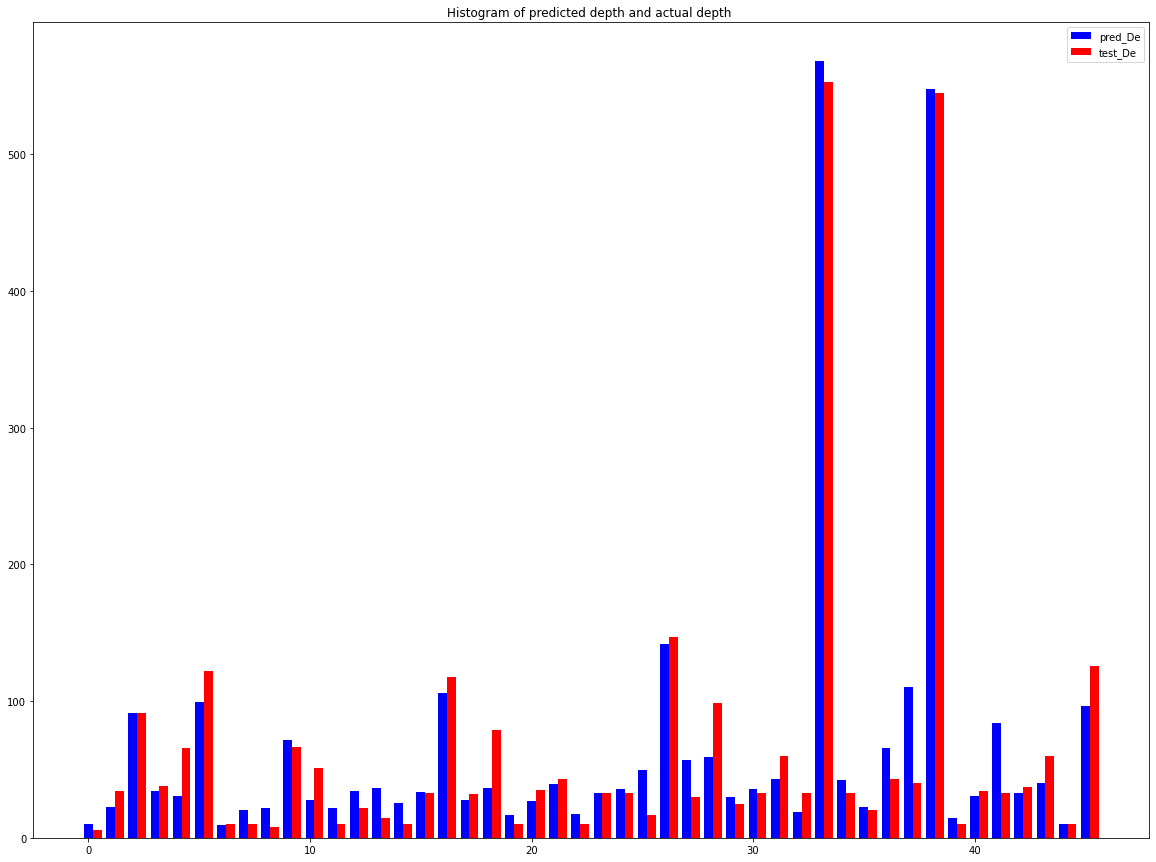

In [27]:
#Earthquake depth prediction and actual comparison chart
 
num_list = pred_De
num_list12=test_De.values.tolist()
num_list13=[i for j in num_list12 for i in j]
num_list1=num_list13[0:46]
print(num_list)
print(num_list1)
print(len(num_list1))
print(len(num_list))
x =list(range(len(y_pred)-4600))
total_width, n = 0.8, 2
width = total_width / n
plt.figure(figsize=[20, 15])
plt.bar(x, num_list, width=width, label='pred_De',fc = 'b')
for i in range(len(x)):
    x[i] = x[i] + width
plt.bar(x, num_list1, width=width, label='test_De',fc = 'r')
plt.title("Histogram of predicted depth and actual depth ")
plt.legend()
plt.show()


[10.181921875000002, 22.627453125, 91.59531250000002, 34.01406250000001, 30.670312499999998, 99.26984374999994, 9.714531250000002, 20.530781249999997, 21.707812499999996, 71.40312500000002, 27.9828125, 22.1546875, 34.565625, 36.54531250000001, 25.253437499999993, 33.295312499999994, 106.24296875000002, 27.665937500000005, 36.20312500000001, 16.660937500000006, 27.01875000000001, 39.6796875, 17.56546875, 32.5296875, 35.6203125, 49.89375, 142.071875, 56.96718750000002, 59.346875000000004, 29.670312500000012, 35.3875, 43.01250000000001, 18.726359374999998, 568.2281250000002, 41.95781250000002, 22.70015625, 65.6640625, 110.22031250000005, 547.9390624999997, 14.440624999999999, 30.7875, 84.26140625000001, 33.014218750000005, 39.91406250000001, 10.0, 96.559375]
[5.7, 5.6, 5.8, 5.9, 5.6, 5.6, 5.6, 6.0, 5.7, 5.6, 5.5, 5.8, 5.6, 6.3, 5.7, 5.6, 5.8, 5.7, 5.5, 6.2, 7.4, 5.8, 5.6, 5.7, 5.8, 6.2, 5.9, 5.5, 5.6, 6.2, 5.6, 5.6, 5.6, 5.6, 5.5, 6.1, 5.7, 6.0, 5.6, 5.5, 5.6, 5.6, 5.5, 6.1, 5.5, 6.2]
46


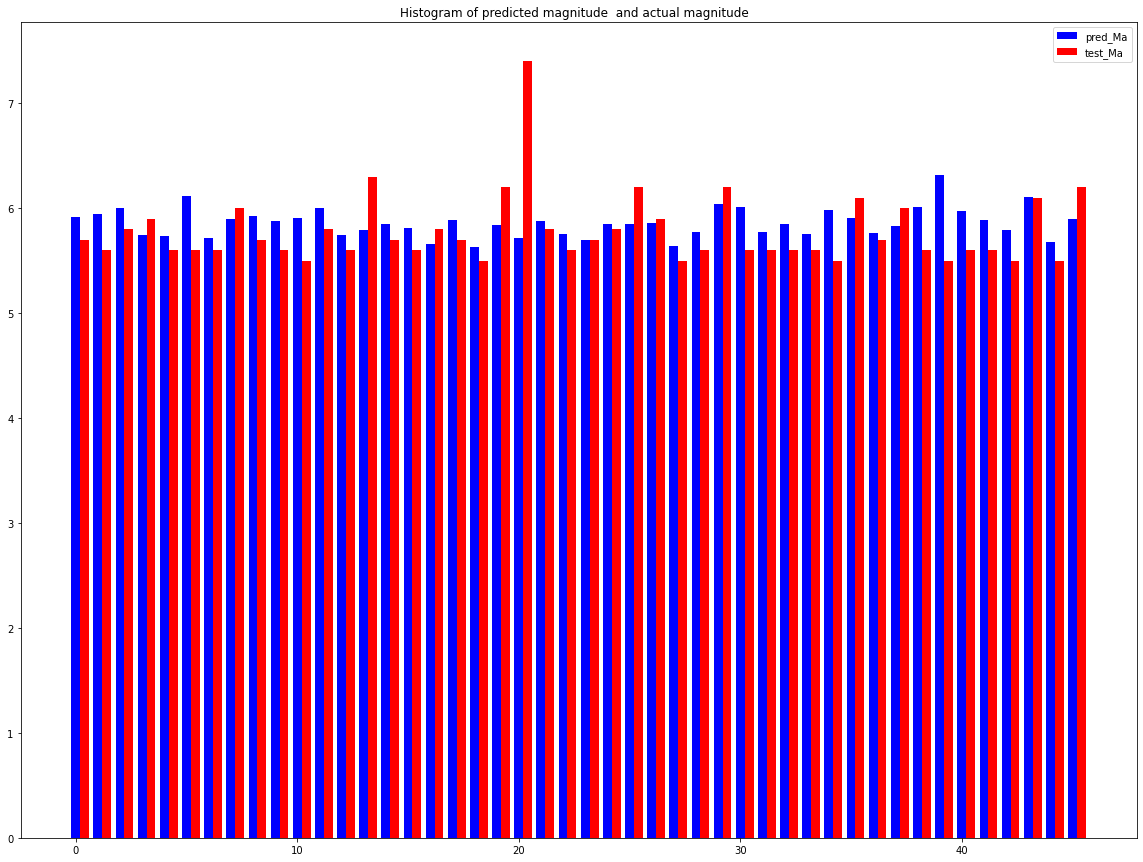

In [28]:
num_list2 = pred_Ma
num_list12=test_Ma.values.tolist()
num_list13=[i for j in num_list12 for i in j]
num_list1=num_list13[0:46]
print(num_list)
print(num_list1)
print(len(num_list1))
print(len(num_list))
x =list(range(len(y_pred)-4600))
total_width, n = 0.8, 2
width = total_width / n
plt.figure(figsize=[20, 15])
plt.bar(x, num_list2, width=width, label='pred_Ma',fc = 'b')
for i in range(len(x)):
    x[i] = x[i] + width
plt.bar(x, num_list1, width=width, label='test_Ma',fc = 'r')
plt.legend()
plt.title("Histogram of predicted magnitude  and actual magnitude  ")
plt.show()


### The result of random forest
Through the constant modification of the parameters of the random forest algorithm, we get the optimal model within the allowable error range. The accuracy of the model is evaluated by Mean Squared Error, R2 score and Model score. MSE is the square mean of the difference between the predicted value and the true value, which can evaluate the degree of change of the data. R2 is the determination coefficient, reflecting the reliability of the change of the dependent variable. Model socre is the score of the model directly given by sklearn, which can provide a reference for directly judging the quality of the model. In the modeling process, when the 'n_estimators' value was set to 64, three indexes reached the highest value. The comparison of two bar chart shows that the depth prediction is more accurate than the magnitude prediction. The predicted value of depth is very close to the true value, while the predicted value of magnitude is poor in the extreme region.

##  Discussion and Conclusion 
This paper aims to use machine learning algorithms to do data analysis and modelling for global volcanic and seismic data. In DBSCAN and random forest data analysis, both models have achieved the desired effect, and visual displays also have been made. As a resul, we can answer the research questions about clustering and seismic model prediction.

The clustering of earthquakes and volcanoes have obvious regularities. They occurring in the same area and are distributed in the shape of belts At the junction of tectonic plates, volcanoes and earthquakes occur frequently，where there are four volcanic seismic zones in a global context. Because volcanoes are immobile, volcanic points are less frequent and more concentrated than earthquake points.

Predicting models for magnitude and depth of earthquakes can achieve more than 85% accuracy. Besides It is more accurate to predict depth than magnitude. This helps us to predict the severity of earthquakes in different areas and to do a good job of prevention in advance. In different areas, different protection strategies should be implemented to maximize the utilization of resources and avoidance of risks.



## Reference
Deschamps, F., Li, Y. and Tackley, P. J. (2015) ‘Large-Scale thermo-Chemical structure of the deep mantle: Observations and models’, in The Earth’s Heterogeneous Mantle: A Geophysical, 

Geodynamical, and Geochemical Perspective. Springer International Publishing, pp. 479–515. doi: 10.1007/978-3-319-15627-9_15.

Manga, M. et al. (2017) Volcanic eruptions and their repose, unrest, precursors, and timing, Volcanic Eruptions and Their Repose, Unrest, Precursors, and Timing. doi: 10.17226/24650.

Mogi, K. (1974) ‘Active periods in the world’s chief seismic belts’, Tectonophysics, 22(3–4), pp. 265–282. doi: 10.1016/0040-1951(74)90086-9.

Smithsonian Institution (no date). Available at: https://www.si.edu/.

USGS.gov | Science for a changing world (no date). Available at: https://www.usgs.gov/ .